### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import functions
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.image as mpimg

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.shape[0]

12684

In [5]:
data.shape[1]

26

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

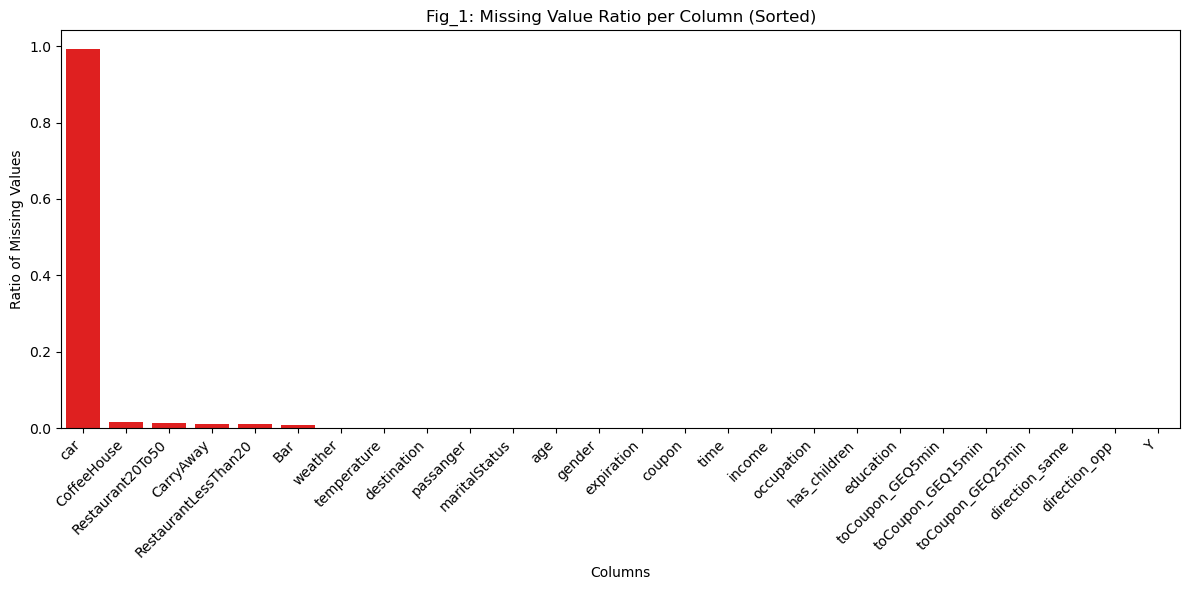

In [7]:
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
missing_values = data.isnull().mean().sort_values(ascending=False)

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(x=missing_values.index, y=missing_values.values, color='red')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Ratio of Missing Values')
plt.title('Fig_1: Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('images/plots/fig1.jpg')

# Show the plot
plt.show()

## Fig_1: Missing Value Ratio per Column (Sorted)

This figure provides a visual representation of the missing value ratio for each column in the dataset, sorted in descending order. It's clear from the plot that the 'Car' column has a significant amount of missing data, with approximately 99.14% of its values missing. This high percentage of missing values may impact the reliability of any analysis involving this column.

On the other hand, the columns 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', and 'Bar' have less than 10% of their values missing. This relatively low percentage of missing values suggests that these columns are more complete and may provide more reliable insights for analysis.

The missing value ratio is an important factor to consider during data cleaning and preprocessing, as it can significantly impact the results of the analysis.s.

In [8]:
# What are the values in the "car" column and how many rows have null values. 
data['car'].value_counts()
print(data['car'].value_counts())
percentage_of_missing_car = data['car'].isnull().mean() * 100
print(f"Percentage missing: {percentage_of_missing_car}")

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Percentage missing: 99.14853358561967


In [9]:
# To inspect different columns I've abstracted the process in the previous section into a function. 
# By modifying the column varabile the information was inspected to better understand the data.
column = "CoffeeHouse"
functions.inspect_dataframe_column(data, column)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
Percentage missing: 1.7108167770419427


3. Decide what to do about your missing data -- drop, replace, other...

## Data Cleanup

### Based on our inspection of the above dataframe columns we find that some values are missing. For the 'CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20','Bar' it will suffice to replace the null values with the value "Unknown". By adding this value we leave the door open for a pattern to emerge for these unknown entries in future analysis, if there happend to be one. If for example a specific demographic disproportionately had a value set as "Unkonwn" there might be more going on. 

### The 'car' column on the other hand has more than 99% of data marked as null and is therefore not useful, so we will remove that column from the dataset. It might have been an issue with the user interface or form the user was presented with.

In [10]:
# We will thus remove the 'car' column from the dataframe...
data_clean = data.drop('car', axis=1)

# And replace the remaining null values with "Unknown".
data_clean = data_clean.fillna('Unknown')

# finally to make the column naming more consistent we'll change them to all caps
data_clean.columns = data_clean.columns.str.upper()

# Secondly we'll standardize the spacing for multiple word columns
# Create a dictionary that maps old column names to new ones
# Note that 'Y' has been renamed 'COUPON_SUCCESS' to indicate that the coupon was used by the customer.
column_names = {
    'Y': 'COUPON_SUCCESS',
    'MARITALSTATUS': 'MARITAL_STATUS',
    'COFFEEHOUSE': 'COFFEE_HOUSE',
    'PASSANGER': 'PASSENGER',
    'RESTAURANTLESSTHAN20': 'RESTAURANT_LESS_THAN_20',
    'RESTAURANT20TO50': 'RESTAURANT_20_TO_50',
}

# Rename the columns
data_clean = data_clean.rename(columns=column_names)

# first 5 rows of the new clean dataframe.
data_clean.head(5)

,DESTINATION,PASSENGER,WEATHER,TEMPERATURE,TIME,COUPON,EXPIRATION,GENDER,AGE,MARITAL_STATUS,...,COFFEE_HOUSE,CARRYAWAY,RESTAURANT_LESS_THAN_20,RESTAURANT_20_TO_50,TOCOUPON_GEQ5MIN,TOCOUPON_GEQ15MIN,TOCOUPON_GEQ25MIN,DIRECTION_SAME,DIRECTION_OPP,COUPON_SUCCESS
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [11]:
# Get the proportion of coupons accepted
coupons_accepted = data_clean.query('COUPON_SUCCESS == 1').count()[['COUPON_SUCCESS']]
proportion_of_accepted_coupons = coupons_accepted  / data_clean.shape[0]
print(proportion_of_accepted_coupons)

COUPON_SUCCESS    0.568433
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

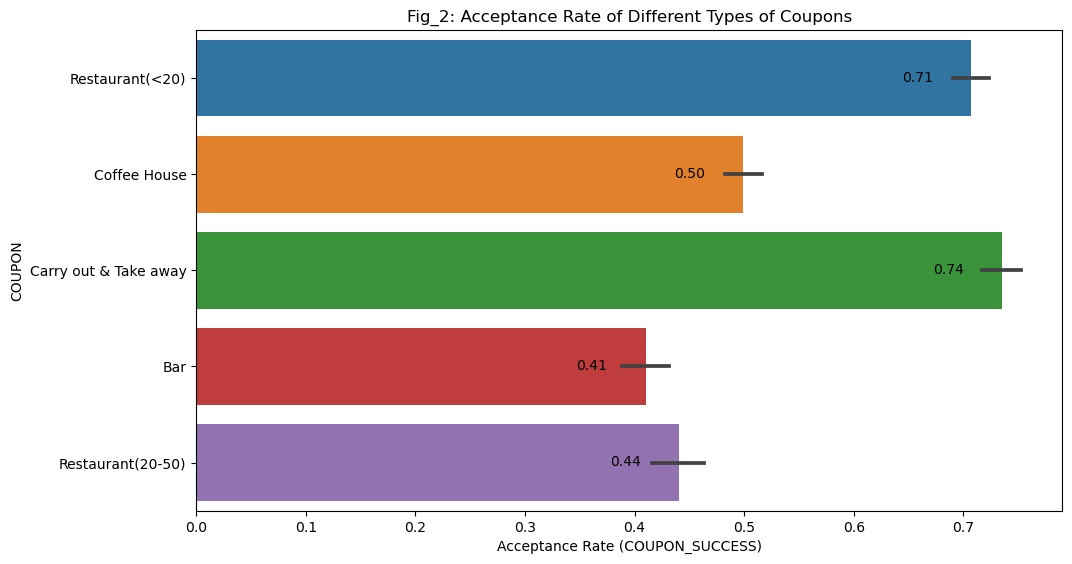

In [12]:
plt.figure(figsize=(12, 6))
fig2 = sns.barplot(data_clean, y='COUPON', x='COUPON_SUCCESS')

fig2.set(title="Fig_2: Acceptance Rate of Different Types of Coupons", xlabel='Acceptance Rate (COUPON_SUCCESS)')

# Add values on the bars
for p in fig2.patches:
    fig2.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-50, -30), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=2.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig2.jpg')

# Show the plot
plt.show()

## Fig_2: Acceptance Rate of Different Types of Coupons

As observed in the data, `Carry Out & Take Away` is the most accepted type of coupon, followed by `Restaurant(<20)`. This insight could be valuable for businesses in tailoring their coupon strategies to customer preferences. 

You can also see the error bars for each coupon. These provide a visual representation of the statistical uncertainty or variability in the acceptance rate for each coupon type. The length of these lines indicates the range within which the true population mean is likely to fall, given the sample data. Seaborn's barplot function uses a 95% confidence interval. 

In summary, the narrower the black rectangle (error bar), the more predictable or consistent the acceptance ratio is for that coupon type. As you can see, the 'Bar' coupon has the lowest acceptance rate and is also very unpredictable.

In [13]:
# Get the unique coupon names
unique_coupons = data_clean['COUPON'].unique()

# Initialize an empty DataFrame to store the results
coupon_stats = pd.DataFrame()

# Iterate over each unique coupon
for coupon in unique_coupons:
    # Query the DataFrame for the current coupon
    coupon_data = data_clean[data_clean['COUPON'] == coupon]
    
    # Get the descriptive statistics for the 'COUPON_SUCCESS' column
    stats = coupon_data['COUPON_SUCCESS'].describe()
    
    # Add the stats to the new DataFrame
    coupon_stats[coupon] = stats

# Display the new DataFrame
print(coupon_stats)


       Restaurant(<20)  Coffee House  Carry out & Take away          Bar  \
count      2786.000000   3996.000000            2393.000000  2017.000000   
mean          0.707107      0.499249               0.735478     0.410015   
std           0.455171      0.500062               0.441170     0.491958   
min           0.000000      0.000000               0.000000     0.000000   
25%           0.000000      0.000000               0.000000     0.000000   
50%           1.000000      0.000000               1.000000     0.000000   
75%           1.000000      1.000000               1.000000     1.000000   
max           1.000000      1.000000               1.000000     1.000000   

       Restaurant(20-50)  
count        1492.000000  
mean            0.441019  
std             0.496676  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000  


## Statistical Description of Acceptance of Different Coupons

The descriptive statistics point to the fact that the "Coffee House" coupons have by far the highest accepted coupon count 3996, but the mean coupon acceptance rate is the highest in the in the "Carry out & Take away" coupons. The lowest count of accepted coupons is the "Restaurant(20-50)" coupon for more expensive restaurants, the lowest mean is the Bar coupon. 

6. Use a histogram to visualize the temperature column.

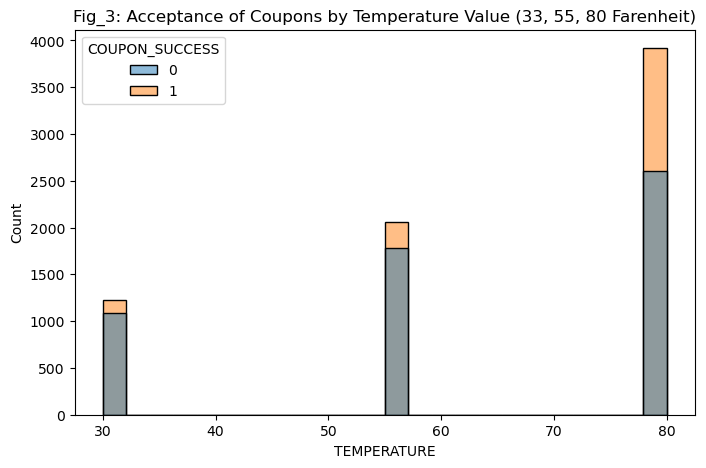

In [14]:
plt.figure(figsize=(8, 5))
fig3 = sns.histplot(data_clean, x="TEMPERATURE", hue="COUPON_SUCCESS")
fig3.set(title="Fig_3: Acceptance of Coupons by Temperature Value (33, 55, 80 Farenheit)")

# Save plot
plt.savefig('images/plots/fig3.jpg')

# Show the plot
plt.show()

## Fig_3: Acceptance of Coupons by Temperature Value

As you can see, the highest temperature of 80 degrees resulted in more than twice the coupon adoption. As a follow-up, let’s investigate that temperature and see what the most popular coupons are at 80 degrees.

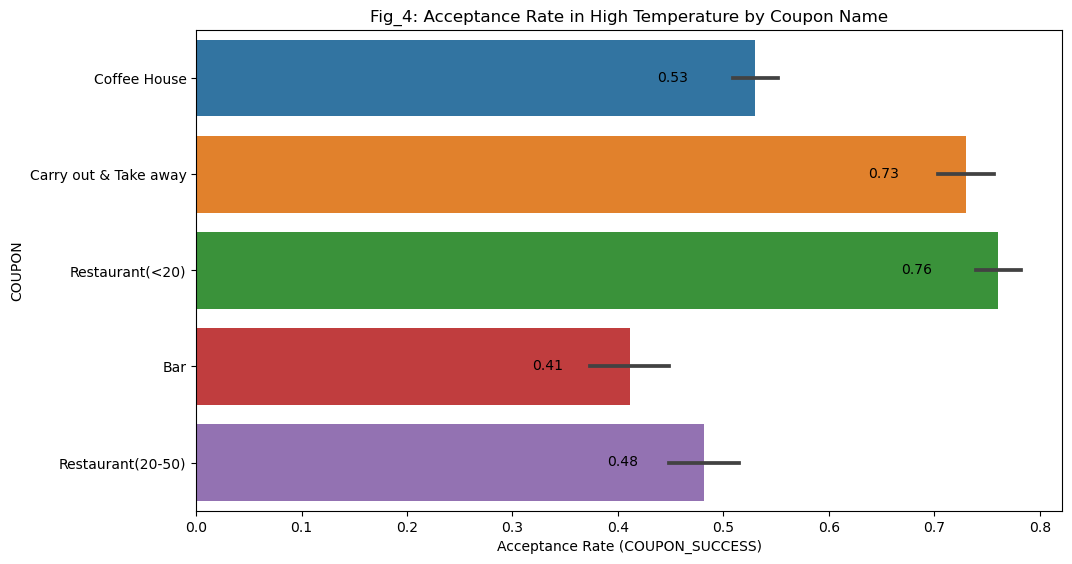

In [15]:
plt.figure(figsize=(12, 6))
fig4 = sns.barplot(data_clean.query('TEMPERATURE == 80'), x="COUPON_SUCCESS", y="COUPON")
fig4.set(title="Fig_4: Acceptance Rate in High Temperature by Coupon Name", xlabel='Acceptance Rate (COUPON_SUCCESS)')

# Add values on the bars
for p in fig4.patches:
    fig4.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-70, -30), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=2)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig4.jpg')

# Show the plot
plt.show()



## Fib_4: Coupon Acceptance in High Temperature by Coupon Name Analysis

Interestingly, the inexpensive restaurant (Restaurant(<20)) and the Carry out & Take Away coupons are the most popular in high heat conditions. Surprisingly, the Bar coupon has the best performance. One might assume that people would seek refreshment at a bar to cool down, but the data does not support this assumption. Based on this data analysis, it appears that people may prefer not to cook in a hot kitchen and would rather be in a temperature-controlled restaurant or opt for takeout that doesn’t require laborious cooking. Another consideration, based on what we observed in Fig_10A, is that the success of inexpensive restaurant coupons correlates with the 2pm and 6pm time slots, which are typically the hottest times of the day. Therefore, the temperature might just be a byproduct of the time of day.

Of course, the data does not provide a definitive explanation for these two coupons’ exceptional performance. Whatever the actual reason for this performance, it is clear that the coupons are particularly effective. Firstly, the coupons in general are much more effective on hot days, and secondly, they are especially effective for carryout and inexpensive restaurants. This analysis provides valuable insights into the factors influencing coupon acceptance.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
data_only_bar_coupon = data_clean.query("COUPON == 'Bar'")

2. What proportion of bar coupons were accepted?


In [17]:
proportion_of_bar_coupon_success = data_only_bar_coupon.query('COUPON_SUCCESS == 1').count()[['COUPON_SUCCESS']] / data_only_bar_coupon['COUPON_SUCCESS'].count()
print(proportion_of_bar_coupon_success)

COUPON_SUCCESS    0.410015
dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


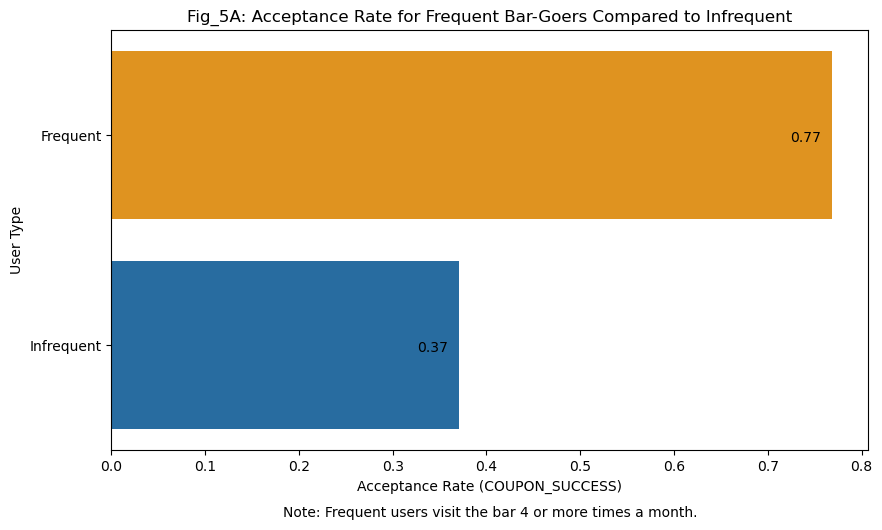

In [18]:
bar_coupon_success_for_frequent_user = data_only_bar_coupon.query("(BAR == '4~8') | (BAR == 'gt8')")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_infrequent_users = data_only_bar_coupon.query("(BAR != '4~8') & (BAR != 'gt8')")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from your variables
bar_coupon_comparison_fig5 = {
    'USER_TYPE': ['Frequent', 'Infrequent'],
    'COUPON_SUCCESS': [bar_coupon_success_for_frequent_user, bar_coupon_success_for_infrequent_users]
}
bar_coupon_comparison_df_fig5 = pd.DataFrame(bar_coupon_comparison_fig5)

# Create a bar chart with Seaborn

# Define the color palette
colors = ["#FF9900", "#146EB4"]  # Orange and Blue

plt.figure(figsize=(10, 6))
fig5a = sns.barplot(x='COUPON_SUCCESS', y='USER_TYPE', data=bar_coupon_comparison_df_fig5, palette=colors, ci=None)

# Set the title and labels
plt.title('Fig_5A: Acceptance Rate for Frequent Bar-Goers Compared to Infrequent')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')

# Add a note using Matplotlib's text function
plt.text(0.5, -0.15, 'Note: Frequent users visit the bar 4 or more times a month.', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add values on the bars
for p in fig5a.patches:
    fig5a.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -65), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig5A.jpg')

# Show the plot
plt.show()

## Fig_5A: Acceptance Rate for Frequent Bar-Goers Compared to Infrequent

As evident from this bar plot, the acceptance rate for frequent bar-goers is significantly higher at 77% compared to that of infrequent bar-goers at 37%.

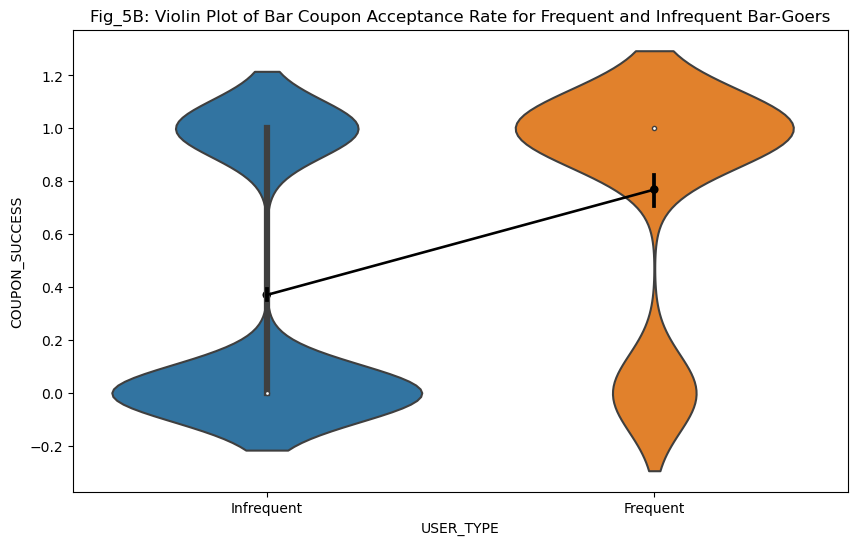

In [19]:
# Create a copy of the DataFrame for fig5 
data_only_bar_coupon_fig5 = data_only_bar_coupon.copy()

# Add a new column 'USER_TYPE' to the DataFrame
data_only_bar_coupon_fig5['USER_TYPE'] = 'Infrequent' #This sets all values as Infrequent which will be corrected on the next step
data_only_bar_coupon_fig5.loc[data_only_bar_coupon_fig5['BAR'].isin(['4~8', 'gt8']), 'USER_TYPE'] = 'Frequent'

# Create the violin plot
plt.figure(figsize=(10, 6))
fig5b = sns.violinplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig5, palette=['#1f77b4', '#ff7f0e'])

# Add the point plot
sns.pointplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig5, color='black', scale=0.7)

plt.title('Fig_5B: Violin Plot of Bar Coupon Acceptance Rate for Frequent and Infrequent Bar-Goers')

# Save plot
plt.savefig('images/plots/fig5B.jpg')

# Show plot
plt.show()

## Fig_5B: Violin Plot of Bar Coupon Acceptance Rate for Frequent and Infrequent Users

This violin plot compares the “COUPON_SUCCESS” between “Frequent” and “Infrequent” users. The plot shows that “Frequent” users generally have a higher success rate (closer to 1), with a narrower distribution indicating less variability in their responses. On the other hand, “Infrequent” users show a wider distribution of success rates, with a peak closer to 0, indicating more variability and generally lower success rates.

### Note about IQR:

The central rectangular black bar of each violin plot represents the Interquartile Range. The Interquartile Range (IQR) is a measure of statistical dispersion, or in simpler terms, it’s a measure of how spread out the values in a data set are around the median.

If the IQR is smaller for “Frequent” users, it means that the middle 50% of “COUPON_SUCCESS” values for “Frequent” users are more closely grouped around the median. In other words, “Frequent” users have less variability in their “COUPON_SUCCESS” values compared to “Infrequent” users.

This could suggest that the behavior of “Frequent” users is more predictable when it comes to coupon success, as their responses are less spread out. On the other hand, “Infrequent” users might have a wider range of behaviors or responses to coupons, as indicated by the larger IQR. Let me know if you need further assistance!nce!

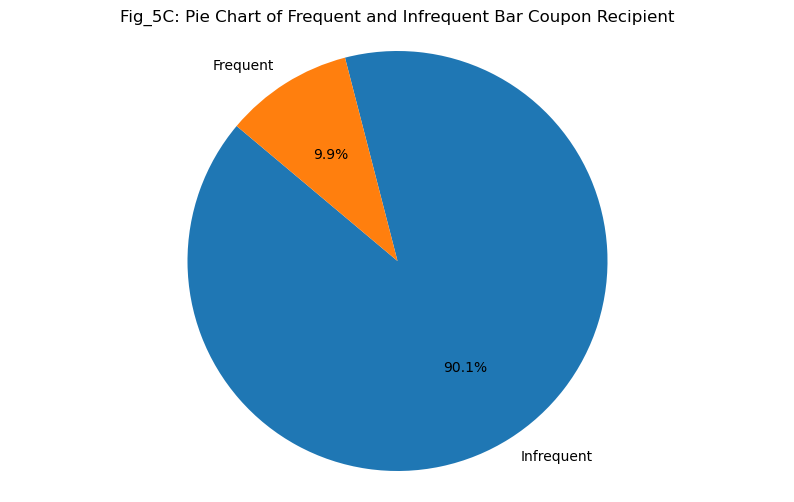

In [20]:
# Get the value counts of the 'USER_TYPE' column
user_type_counts_fig5 = data_only_bar_coupon_fig5['USER_TYPE'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts_fig5, labels=user_type_counts_fig5.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Fig_5C: Pie Chart of Frequent and Infrequent Bar Coupon Recipient')

# Save plot
plt.savefig('images/plots/fig5C.jpg')

# Show plot
plt.show()

## Fig_5C: Pie Chart of Frequent and Infrequent Bar Coupon Recipient

This plot compares 'COUPON_SUCCESS' for 'Frequent' and 'Infrequent' users. 'Frequent' users that receive the coupon are a smaller population 9.9% of the all who receive bar coupons.

In [21]:
# Percentage difference calculated using Numpy calculation from functions.py file. 
# Function: np.abs(value1 - value2) / np.mean([value1, value2]) * 100 from functions.py file.
percentage_difference_fig5 = functions.calculate_percentage_difference(bar_coupon_success_for_frequent_user, bar_coupon_success_for_infrequent_users)
print(f'percentage_difference_fig5: {percentage_difference_fig5}')

percentage_difference_fig5: 69.86902105365286


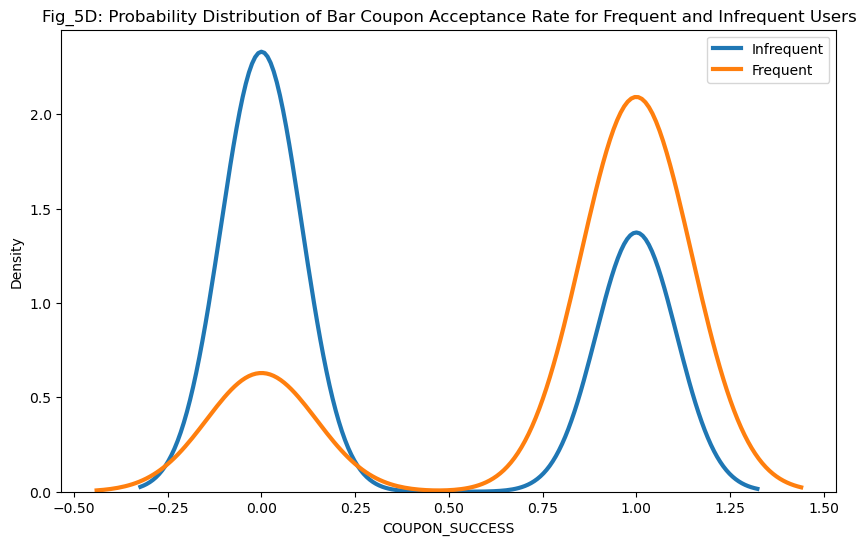

In [22]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Create a kdeplot for 'Infrequent' users
sns.kdeplot(data_only_bar_coupon_fig5[data_only_bar_coupon_fig5['USER_TYPE'] == 'Infrequent']['COUPON_SUCCESS'], 
            linewidth=3, 
            label='Infrequent')

# Create a kdeplot for 'Frequent' users
sns.kdeplot(data_only_bar_coupon_fig5[data_only_bar_coupon_fig5['USER_TYPE'] == 'Frequent']['COUPON_SUCCESS'], 
            linewidth=3, 
            label='Frequent')

# Add title and labels
plt.title('Fig_5D: Probability Distribution of Bar Coupon Acceptance Rate for Frequent and Infrequent Users')
plt.xlabel('COUPON_SUCCESS')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Save plot
plt.savefig('images/plots/fig5D.jpg')

# Show the plot
plt.show()


## Fig_5D: Probability Distribution of Bar Coupon Acceptance Rate for Frequent and Infrequent Users

The plot reveals that 'Frequent' users have a higher **probability density** around the 1 value for 'COUPON_SUCCESS'. This suggests that 'Frequent' users are more likely to accept and use the coupons, demonstrating a higher success rate. This insight could be valuable for tailoring marketing strategies to effectively engage this user segment.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


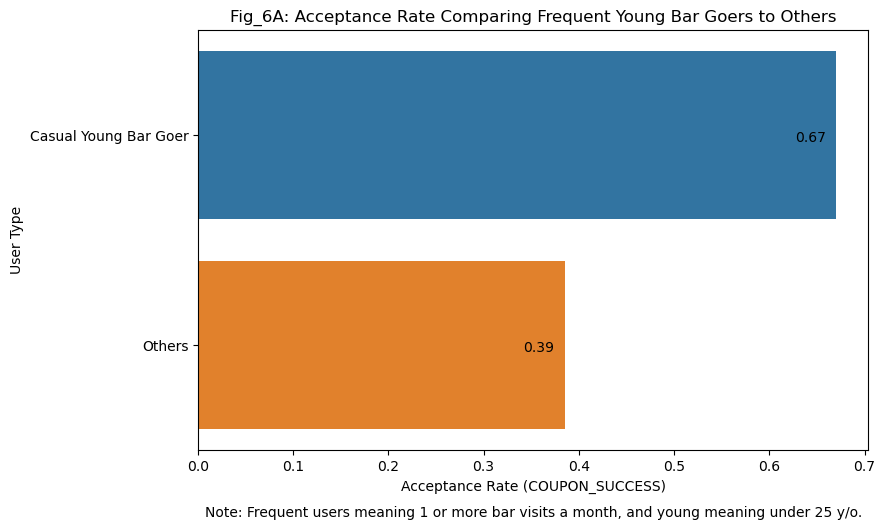

In [23]:
# Technically below 21 should not be required if the country was the United States as this would be illegal, but here for completeness.
under_25 = ['below21','21'] 
one_visit_a_month_or_more = ['1~3','4~8','gt8']
bar_coupon_success_for_casual_young_users = data_only_bar_coupon.query("BAR in @one_visit_a_month_or_more & AGE in @under_25")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_others = data_only_bar_coupon.query("not (BAR in @one_visit_a_month_or_more & AGE in @under_25)")[['COUPON_SUCCESS']].mean().values[0]

# Create a DataFrame from your variables
bar_coupon_comparison_fig6 = {
    'USER_TYPE': ['Casual Young Bar Goer', 'Others'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_young_users, bar_coupon_success_for_others]
}
bar_coupon_comparison_df_fig6 = pd.DataFrame(bar_coupon_comparison_fig6)

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
fig6a = sns.barplot(x='COUPON_SUCCESS', y='USER_TYPE', data=bar_coupon_comparison_df_fig6, ci=None)

# Set the title and labels
plt.title('Fig_6A: Acceptance Rate Comparing Frequent Young Bar Goers to Others')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')

# Add a note using Matplotlib's text function
plt.text(0.5, -0.15, 'Note: Frequent users meaning 1 or more bar visits a month, and young meaning under 25 y/o.', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add values on the bars
for p in fig6a.patches:
    fig6a.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -65), 
                   textcoords='offset points')
# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig6A.jpg')

# Show the plot
plt.show()

## Fig_6A: Acceptance Rate Comparing Frequent Young Bar Goers to Others

This figure compares the acceptance rate of 'Frequent Young Bar Goers' to others. Notably, 'Casual Young Bar Goers' have a 67% acceptance rate. This suggests that younger, casual bar goers are more likely to accept coupons, which could be a valuable insight for tailoring marketing strategies.


In [24]:
# Percentage difference calculated w/ same function as before
percentage_difference2 = functions.calculate_percentage_difference(bar_coupon_success_for_casual_young_users, bar_coupon_success_for_others)
print(f'percentage_difference2: {percentage_difference2}')

percentage_difference2: 54.06318891767196


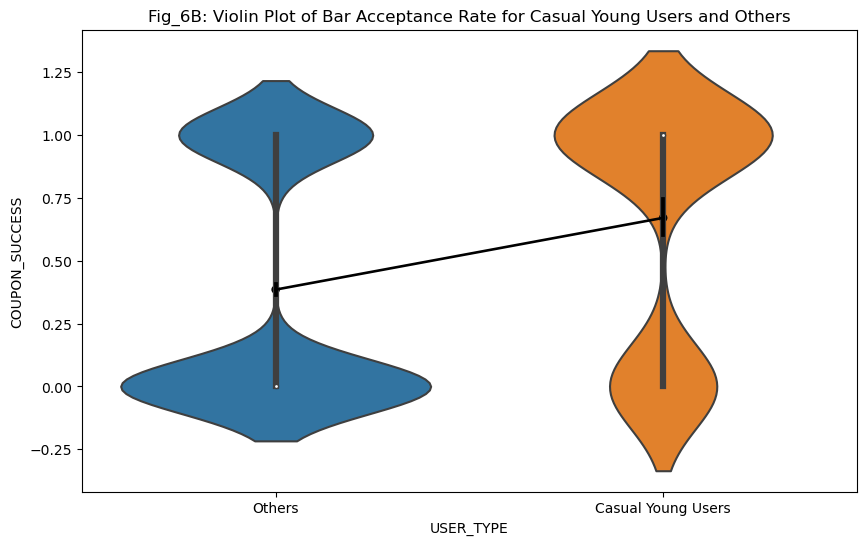

In [25]:
# Create a copy of the DataFrame
data_only_bar_coupon_fig6 = data_only_bar_coupon.copy()

# Define the categories
under_25 = ['below21','21'] 
one_visit_a_month_or_more = ['1~3','4~8','gt8']

# Add a new column 'USER_TYPE' to the DataFrame
data_only_bar_coupon_fig6['USER_TYPE'] = 'Others' #This sets all values as Others which will be corrected on the next step
data_only_bar_coupon_fig6.loc[(data_only_bar_coupon_fig6['BAR'].isin(one_visit_a_month_or_more)) & (data_only_bar_coupon_fig6['AGE'].isin(under_25)), 'USER_TYPE'] = 'Casual Young Users'

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig6, palette=['#1f77b4', '#ff7f0e'])

# Add the point plot
sns.pointplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig6, color='black', scale=0.7)

plt.title('Fig_6B: Violin Plot of Bar Acceptance Rate for Casual Young Users and Others')

# Save plot
plt.savefig('images/plots/fig6B.jpg')

# Show plot
plt.show()

## Fig_6B: Violin Plot of Bar Acceptance Rate for Casual Young Users and Others

This violin plot compares the 'COUPON_SUCCESS' between 'Casual Young Users' and others. The plot shows that 'Casual Young Users' have a higher success rate (closer to 1), with a narrower distribution indicating less variability in their responses. On the other hand, other users show a wider distribution of success rates, indicating more variability and generally lower success rates.

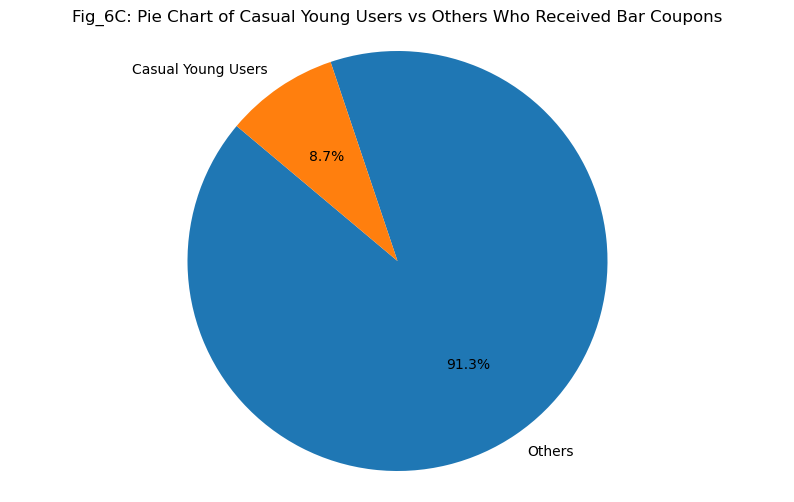

In [26]:
# Get the value counts of the 'USER_TYPE' column
user_type_counts_fig6 = data_only_bar_coupon_fig6['USER_TYPE'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts_fig6, labels=user_type_counts_fig6.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Fig_6C: Pie Chart of Casual Young Users vs Others Who Received Bar Coupons')

# Save plot
plt.savefig('images/plots/fig6C.jpg')

# Show plot
plt.show()

## Fig_6C: Pie Chart of Casual Young Users vs Others Who Received Bar Coupons

This pie chart provides a visual comparison between 'Casual Young Users' and others. It's evident from the chart that 'Casual Young Users' form a smaller cohort, making up only 8.7% of the total users.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


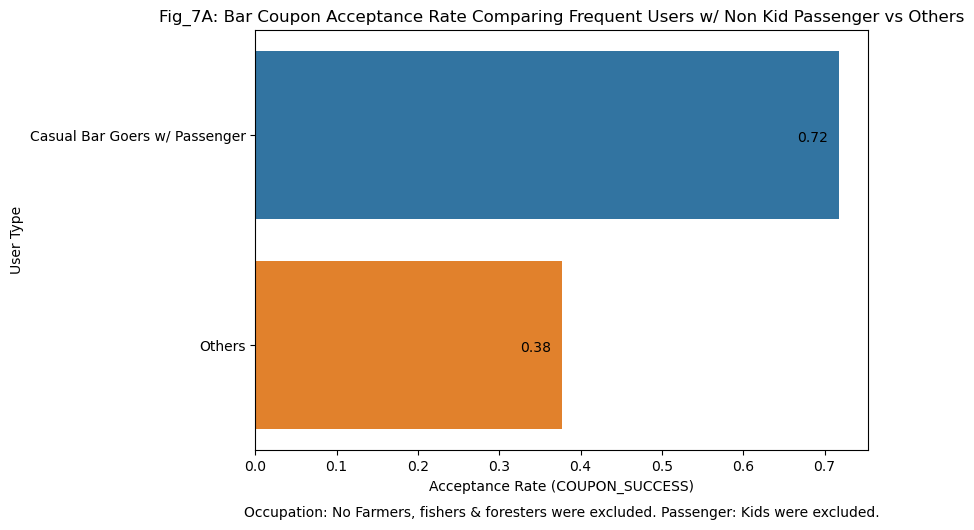

In [27]:
occupation = ['Farming Fishing & Forestry'] 
passenger = ['Kid(s)', 'Alone']
one_visit_a_month_or_more = ['1~3','4~8','gt8']
bar_coupon_success_for_casual_w_passenger = data_only_bar_coupon.query("BAR in @one_visit_a_month_or_more & OCCUPATION not in @occupation & PASSENGER not in @passenger")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_others = data_only_bar_coupon.query("not (BAR in @one_visit_a_month_or_more & OCCUPATION not in @occupation & PASSENGER not in @passenger)")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from your variables
bar_coupon_comparison_fig7 = {
    'USER_TYPE': ['Casual Bar Goers w/ Passenger', 'Others'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_w_passenger, bar_coupon_success_for_others]
}

bar_coupon_comparison_df_fig7 = pd.DataFrame(bar_coupon_comparison_fig7)

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
fig7a = sns.barplot(x='COUPON_SUCCESS', y='USER_TYPE', data=bar_coupon_comparison_df_fig7, ci=None)

# Set the title and labels
plt.title('Fig_7A: Bar Coupon Acceptance Rate Comparing Frequent Users w/ Non Kid Passenger vs Others')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')

# Add a note using Matplotlib's text function
plt.text(0.5, -0.15, 'Occupation: No Farmers, fishers & foresters were excluded. Passenger: Kids were excluded.', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add values on the bars
for p in fig7a.patches:
    fig7a.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -65), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig7A.jpg')

# Show the plot
plt.show()

## Fig_7A: Bar Coupon Acceptance Rate Comparing Frequent Users w/ Non Kid Passenger vs Others

This figure provides a visual comparison of the acceptance rate between 'Frequent Users w/ Non Kid Passenger' and others. The bar plot clearly shows that 'Frequent Users w/ Non Kid Passenger' have a significantly higher acceptance rate. This could suggest that the presence of a non-kid passenger influences the likelihood of frequent users accepting a coupon.


In [28]:
# Percentage difference
percentage_difference3 = functions.calculate_percentage_difference(bar_coupon_success_for_casual_w_passenger, bar_coupon_success_for_others)
print(f'percentage_difference3: {percentage_difference3}')

percentage_difference3: 62.26272025087073


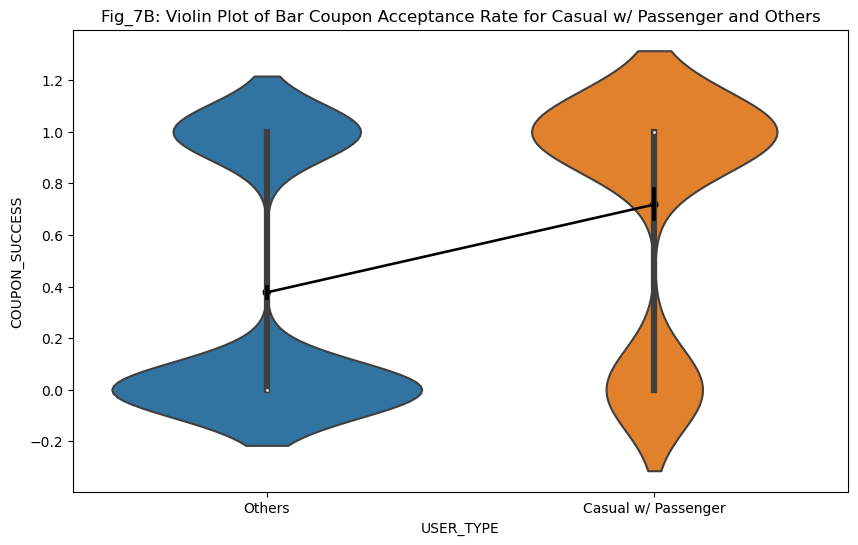

In [29]:
# Create a copy of the DataFrame
data_only_bar_coupon_fig7 = data_only_bar_coupon.copy()

# Define the categories
occupation = ['Farming Fishing & Forestry'] 
passenger = ['Kid(s)', 'Alone']
one_visit_a_month_or_more = ['1~3','4~8','gt8']

# Add a new column 'USER_TYPE' to the DataFrame
data_only_bar_coupon_fig7['USER_TYPE'] = 'Others' #This sets all values as Others which will be corrected on the next step
data_only_bar_coupon_fig7.loc[(data_only_bar_coupon_fig7['BAR'].isin(one_visit_a_month_or_more)) & (~data_only_bar_coupon_fig7['OCCUPATION'].isin(occupation)) & (~data_only_bar_coupon_fig7['PASSENGER'].isin(passenger)), 'USER_TYPE'] = 'Casual w/ Passenger'

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig7, palette=['#1f77b4', '#ff7f0e'])

# Add the point plot
sns.pointplot(x='USER_TYPE', y='COUPON_SUCCESS', data=data_only_bar_coupon_fig7, color='black', scale=0.7)

plt.title('Fig_7B: Violin Plot of Bar Coupon Acceptance Rate for Casual w/ Passenger and Others')

# Save plot
plt.savefig('images/plots/fig7B.jpg')

# Show the plot
plt.show()


## Fig_7B: Violin Plot of Bar Coupon Acceptance Rate for Casual w/ Passenger and Others

This violin plot compares the 'COUPON_SUCCESS' between 'Casual w/ Passenger' and others. The plot shows that 'Casual w/ Passenger' users have a higher success rate (closer to 1), with a narrower distribution indicating less variability in their responses. On the other hand, other users show a wider distribution of success rates, indicating more variability and generally lower success rates.

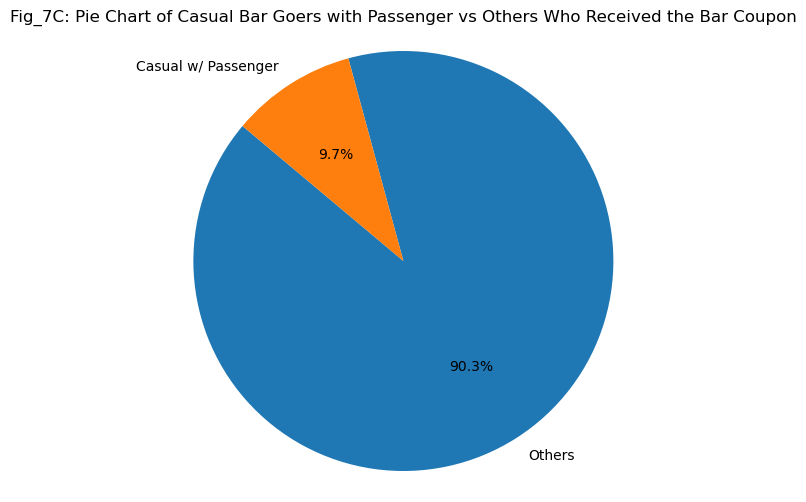

In [30]:
# Get the value counts of the 'USER_TYPE' column
user_type_counts_fig7 = data_only_bar_coupon_fig7['USER_TYPE'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts_fig7, labels=user_type_counts_fig7.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Fig_7C: Pie Chart of Casual Bar Goers with Passenger vs Others Who Received the Bar Coupon')

# Save plot
plt.savefig('images/plots/fig7C.jpg')

# Show plot
plt.show()


## Fig_7C: Pie Chart of Casual Bar Goers with Passenger vs Others Who Received the Bar Coupon

This pie chart provides a visual comparison between 'Casual w/ Passenger' users and others. It's evident from the chart that 'Casual w/ Passenger' users form a smaller cohort, making up only 9.7% of the total users. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



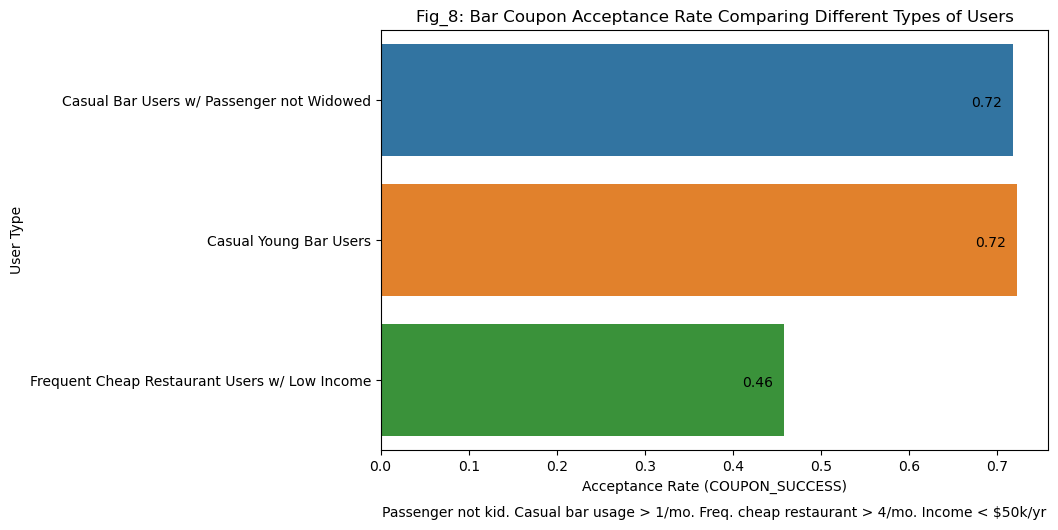

In [31]:
passenger_range = ['Kid(s)', 'Alone']
bar_frequency_range = ['1~3','4~8','gt8']
marital_status = ['Widowed']
age_range = ['below21','21', '26'] 
restaurant_frequency_range = ['4~8','gt8']
income_range = ['$25000 - $37499','$12500 - $24999','$37500 - $49999']
bar_coupon_success_for_casual_w_passenger_not_widowed = data_only_bar_coupon.query("BAR in @bar_frequency_range & MARITAL_STATUS not in @marital_status & PASSENGER not in @passenger")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_for_casual_under_30 = data_only_bar_coupon.query("BAR in @bar_frequency_range & AGE in @age_range")[['COUPON_SUCCESS']].mean().values[0]
bar_coupon_success_frequent_restaurant_low_income = data_only_bar_coupon.query("RESTAURANT_LESS_THAN_20 in @restaurant_frequency_range & INCOME in @income_range")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from your variables
bar_coupon_comparison3 = {
    'USER_TYPE': ['Casual Bar Users w/ Passenger not Widowed', 'Casual Young Bar Users', 'Frequent Cheap Restaurant Users w/ Low Income'],
    'COUPON_SUCCESS': [bar_coupon_success_for_casual_w_passenger_not_widowed, bar_coupon_success_for_casual_under_30, bar_coupon_success_frequent_restaurant_low_income]
}

bar_coupon_comparison_df3 = pd.DataFrame(bar_coupon_comparison3)

# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
fig8 = sns.barplot(x='COUPON_SUCCESS', y='USER_TYPE', data=bar_coupon_comparison_df3, ci=None)

# Set the title and labels
plt.title('Fig_8: Bar Coupon Acceptance Rate Comparing Different Types of Users')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')

# Add a note using Matplotlib's text function
plt.text(0.5, -0.15, 'Passenger not kid. Casual bar usage > 1/mo. Freq. cheap restaurant > 4/mo. Income < $50k/yr', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add values on the bars
for p in fig8.patches:
    fig8.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -45), 
                   textcoords='offset points')
    
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)
# Save plot
plt.savefig('images/plots/fig8.jpg')
# Show the plot
plt.show()


## Fig_8: Bar Coupon Acceptance Rate Comparing Different Types of Users

This bar graph compares the coupon acceptance rate among three different types of users: 'Casual Bar Users w/ Passenger not Widowed', 'Casual Young Bar Users', and 'Frequent Cheap Restaurant Users w/ Low Income'. As observed, 'Casual Bar Users w/ Passenger not Widowed' and 'Casual Young Bar Users' have a similar acceptance rate of approximately 0.72, while 'Frequent Cheap Restaurant Users w/ Low Income' have a lower acceptance rate of approximately 0.46. This suggests that user type and certain characteristics, such as age and income level, may influence the likelihood of accepting a bar coupon.


In [32]:
# Percentage Difference between Frequent Restaurant Users w/ Low Income and Casual Young Bar Users groups
percentage_difference4 = functions.calculate_percentage_difference(bar_coupon_success_frequent_restaurant_low_income, bar_coupon_success_for_casual_under_30)
print(f'percentage_difference4: {percentage_difference4}')

# Percentage Difference between Frequent Restaurant Users w/ Low Income and Casual Bar Users w/ Passenger not Widowed
percentage_difference5 = functions.calculate_percentage_difference(bar_coupon_success_frequent_restaurant_low_income, bar_coupon_success_for_casual_w_passenger_not_widowed)
print(f'percentage_difference5: {percentage_difference5}')

percentage_difference4: 44.80178488830844
percentage_difference5: 44.301352221506754


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Out of all the coupons the Bar coupons were accepted the least at an acceptance rate of 41% . See Fig2.

  
* When the temperature is highest (80 Farenheit) other coupons like Carry Out & Takeaway and Restaurant see an uptick. Bar coupons are not affected.
  


* Frequent bar goers are much more likely to accept a bar coupon. See Fig_5A.


* Casual young bar goers are more likely than others to accept a bar coupon. See Fig_6A.


  .
* Casual bar users w/ a passengerthat is not a child where more likely than others to accept the coupon. See Fig_7A.
  
  
* In Fig8 we saw that  Casual bar users w/ passenger not widowed and casual young bar users accept coupons in a very similar ratio.
* Interestingly, frequent inexpensive restaurant users with low incomes have an acceptance rate that is close to the average. One could have imagined that frequent restaurant usage would translate to higher acceptance rate but it does not "move the needle".
  
The Bar Coupon Acceptance tends to do well with young people, people that visit bars frequently and people that have a passenger onboard. 


The Casual Bar Users w/ Passenger not Widowed group has a very similar approximate rate than the Casual Young Bar Users group.


### Figure 5 Series: Conclusions About Bar Coupons as it Relates to Frequent and Infrequent Bar-Goers

The analysis reveals distinct patterns in the behavior of "Frequent" and "Infrequent" bar-goers. "Frequent" users demonstrate a significantly higher coupon acceptance rate of 77%, compared to 37% for "Infrequent" users. This suggests that "Frequent" users are more receptive to coupons, making them a valuable target segment for marketing strategies.

The violin plot further underscores this finding, showing that "Frequent" users not only have a higher success rate but also exhibit less variability in their responses. This indicates a more predictable behavior pattern among "Frequent" users when it comes to coupon acceptance.

Interestingly, despite representing a smaller population (9.9% of all who receive bar coupons), "Frequent" users show a higher probability density around the 1 value for "COUPON_SUCCESS". This suggests that they are more likely to accept and use the coupons, further emphasizing their potential as a key target segment.

On the other hand, "Infrequent" users show more variability in their responses and generally lower success rates. This group might require different strategies to enhance coupon acceptance, possibly involving more personalized or targeted approaches.

In conclusion, understanding the distinct behaviors of "Frequent" and "Infrequent" users can provide valuable insights for tailoring effective coupon-based marketing strategies. Further research could explore the specific factors influencing these behaviors to optimize coupon design and distribution.

### Figure 6 Series: Conclusions on Bar Coupon Acceptance Among Frequent Young Bar Goers

The analysis of the data reveals several key insights about the coupon acceptance behavior of "Frequent Young Bar Goers" compared to other users:

Higher Acceptance Rate: "Casual Young Bar Goers" have a significantly higher coupon acceptance rate of 67%. This suggests that younger, casual bar-goers are more receptive to coupons, which could be a valuable insight for tailoring marketing strategies.
Less Variability in Responses: The violin plot shows that "Casual Young Users" not only have a higher success rate but also exhibit less variability in their responses. This indicates a more predictable behavior pattern among "Casual Young Users" when it comes to coupon acceptance.
Smaller Cohort: Despite their higher acceptance rate, "Casual Young Users" form a smaller cohort, making up only 8.7% of the total users who receive bar coupons. This suggests that there might be an opportunity to expand the distribution of coupons to this demographic.
In conclusion, these findings highlight the potential of targeting "Casual Young Bar Goers" with coupons, given their higher acceptance rate and less variability in responses. Further research could explore the specific factors influencing these behaviors to optimize coupon design and distribution strategies.

### Figure 7 Series: Conclusions on Bar Coupon Acceptance Among Frequent Bar-Goers with Non-Kid Passengers

The analysis of the data reveals several key insights about the coupon acceptance behavior of "Frequent Users w/ Non Kid Passenger" compared to other users:

Higher Acceptance Rate: "Frequent Users w/ Non Kid Passenger" have a significantly higher coupon acceptance rate. This suggests that the presence of a non-kid passenger influences the likelihood of frequent users accepting a coupon, which could be a valuable insight for tailoring marketing strategies.

Less Variability in Responses: The violin plot shows that "Casual w/ Passenger" users not only have a higher success rate but also exhibit less variability in their responses. This indicates a more predictable behavior pattern among "Casual w/ Passenger" users when it comes to coupon acceptance.

Smaller Cohort: Despite their higher acceptance rate, "Casual w/ Passenger" users form a smaller cohort, making up only 9.7% of the total users who receive bar coupons. This suggests that there might be an opportunity to expand the distribution of coupons to this demographic.

In conclusion, these findings highlight the potential of targeting "Frequent Users w/ Non Kid Passenger" with coupons, given their higher acceptance rate and less variability in responses. Further research could explore the specific factors influencing these behaviors to optimize coupon design and distribution strategies. This analysis provides valuable insights into the factors influencing coupon acceptance.

### Figure 8: Conclusion on Bar Coupon Acceptance Among Different User Types

User types and certain characteristics, such as age and income level, appear to significantly influence the likelihood of accepting a bar coupon. These insights can be instrumental in tailoring effective coupon-based marketing strategies to target different user groups. Further research could explore these relationships in more depth to optimize coupon design and distribution.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
# This custom function can be used to inspect a specific column's values.
functions.inspect_dataframe_column(data_clean, 'PASSENGER')


PASSENGER
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Percentage missing: 0.0


In [34]:
# Create a Dataframe Where COUPON is exclusively Restaurant(<20). Henceforth we'll call this "cheap restaurant" 
data_only_cheap_restaurant_coupon = data_clean.query("COUPON == 'Restaurant(<20)'")

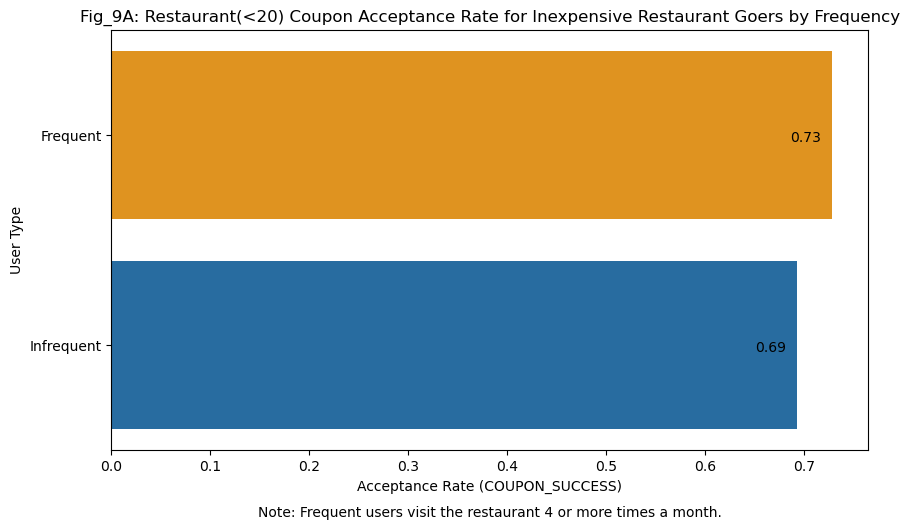

In [35]:
# We query the dataframe to extract frequent and infrequent user means
cheap_restaurant_coupon_success_for_frequent_user = data_only_cheap_restaurant_coupon.query("(RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8')")[['COUPON_SUCCESS']].mean().values[0]
cheap_restaurant_coupon_success_for_infrequent_user = data_only_cheap_restaurant_coupon.query("not ((RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8'))")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from the variables
restaurant_coupon_comparison1 = {
    'USER_TYPE': ['Frequent', 'Infrequent'],
    'COUPON_SUCCESS': [cheap_restaurant_coupon_success_for_frequent_user, cheap_restaurant_coupon_success_for_infrequent_user]
}
restaurant_coupon_comparison_df1 = pd.DataFrame(restaurant_coupon_comparison1)

# Define the color palette
colors = ["#FF9900", "#146EB4"]  # Orange and Blue

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
fig9 = sns.barplot(restaurant_coupon_comparison_df1, x='COUPON_SUCCESS', y='USER_TYPE',  palette=colors, ci=None)

# Set the title and labels
plt.title('Fig_9A: Restaurant(<20) Coupon Acceptance Rate for Inexpensive Restaurant Goers by Frequency')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')

# Add a note using Matplotlib's text function
plt.text(0.5, -0.15, 'Note: Frequent users visit the restaurant 4 or more times a month.', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add values on the bars
for p in fig9.patches:
    fig9.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -65), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig9A.jpg')

# Show the plot
plt.show()

## Fig_9A: Acceptance Rate for Inexpensive Restaurant Goers by Frequency

This figure provides a visual comparison of the acceptance rate between 'Frequent' and 'Infrequent' users. Frequent users have a slightly higher acceptance rate.

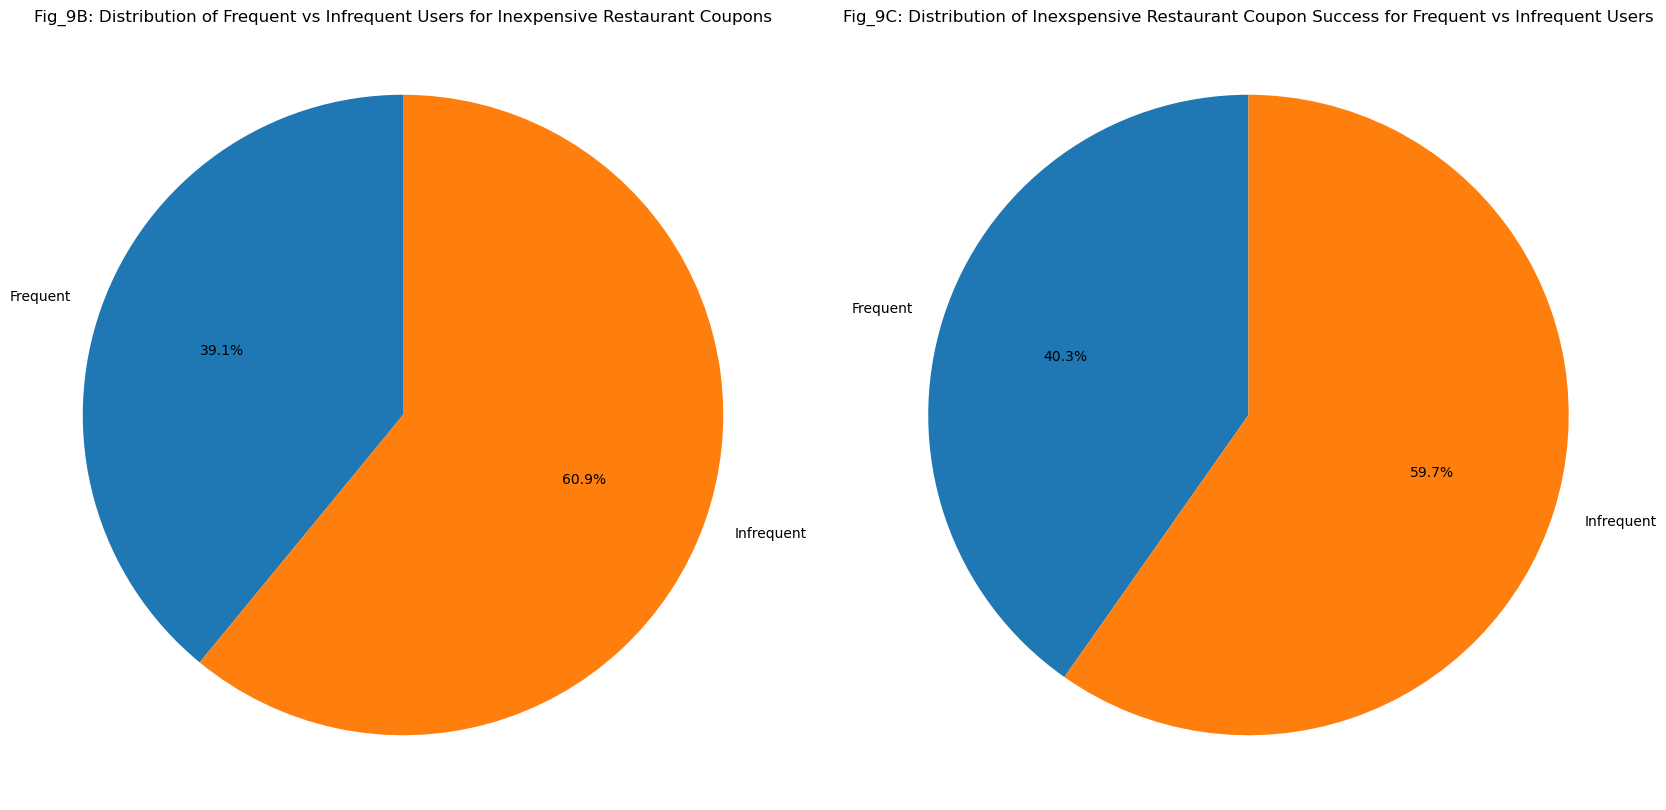

In [36]:
# Count the number of frequent and infrequent users
frequent_users = data_only_cheap_restaurant_coupon.query("(RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8')").shape[0]
infrequent_users = data_only_cheap_restaurant_coupon.query("not ((RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8'))").shape[0]

# Create a DataFrame from the counts
restaurant_user_comparison = pd.DataFrame({
    'USER_TYPE': ['Frequent', 'Infrequent'],
    'COUNT': [frequent_users, infrequent_users]
})

# Count the number of COUPON_SUCCESS for each group
frequent_success = data_only_cheap_restaurant_coupon.query("((RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8')) & (COUPON_SUCCESS == 1)").shape[0]
infrequent_success = data_only_cheap_restaurant_coupon.query("not ((RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8')) & (COUPON_SUCCESS == 1)").shape[0]

# Create a DataFrame from the counts
coupon_success_comparison = pd.DataFrame({
    'USER_TYPE': ['Frequent', 'Infrequent'],
    'COUNT': [frequent_success, infrequent_success]
})

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Create the first pie chart
axs[0].pie(restaurant_user_comparison['COUNT'], 
           labels=restaurant_user_comparison['USER_TYPE'], 
           autopct='%1.1f%%', 
           startangle=90)
axs[0].set_title("Fig_9B: Distribution of Frequent vs Infrequent Users for Inexpensive Restaurant Coupons")
axs[0].axis('equal')

# Create the second pie chart
axs[1].pie(coupon_success_comparison['COUNT'], 
           labels=coupon_success_comparison['USER_TYPE'], 
           autopct='%1.1f%%', 
           startangle=90)
axs[1].set_title("Fig_9C: Distribution of Inexspensive Restaurant Coupon Success for Frequent vs Infrequent Users")
axs[1].axis('equal')

# Save plot
plt.savefig('images/plots/fig9BC.jpg')

# Show the plot
plt.show()

## Fig_9B: Distribution of Frequent vs Infrequent Users for Inexpensive Restaurant Coupons

This pie chart provides a visual comparison between 'Frequent' and 'Infrequent' users for inexpensive restaurant coupons. It's evident from the chart that 'Frequent' users form a smaller cohort, making up only 39.1% of the total users, while 'Infrequent' users make up the majority with 60.9%. 

## Fig_9C: Distribution of Inexspensive Restaurant Coupon Success for Frequent vs Infrequent Users

It's evident from the chart that 'Frequent' users while they accept the coupons at a higher success rate, from what we saw in Fig_9A in this figure we can see that that difference is not enough to change the overall dynamic. The bigger cohort which is infrequent restaurant goers also has the highest amount of coupon success even if the rate of success (acceptance rate) is lower. 

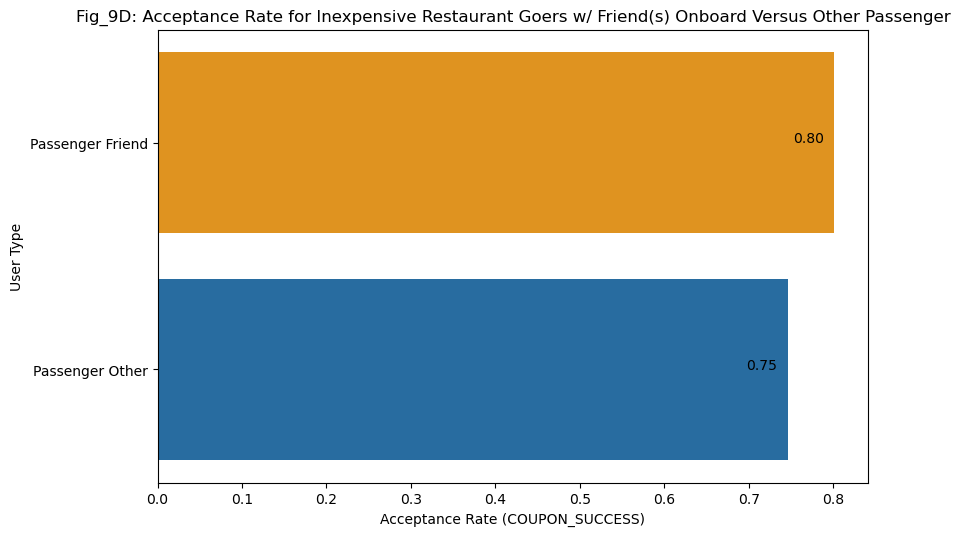

In [37]:
# We query the dataframe to extract frequent and infrequent user means
cheap_restaurant_coupon_success_for_friend_passenger = data_only_cheap_restaurant_coupon.query("PASSENGER == 'Friend(s)'")[['COUPON_SUCCESS']].mean().values[0]
cheap_restaurant_coupon_success_for_other_passenger = data_only_cheap_restaurant_coupon.query("not ((PASSENGER == 'Friend(s)') | (PASSENGER == 'Alone'))")[['COUPON_SUCCESS']].mean().values[0]
# Create a DataFrame from the variables
restaurant_coupon_comparison1 = {
    'USER_TYPE': ['Passenger Friend', 'Passenger Other'],
    'COUPON_SUCCESS': [cheap_restaurant_coupon_success_for_friend_passenger, cheap_restaurant_coupon_success_for_other_passenger]
}
restaurant_coupon_comparison_df2 = pd.DataFrame(restaurant_coupon_comparison1)

# Define the color palette
colors = ["#FF9900", "#146EB4"]  # Orange and Blue

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
fig9D = sns.barplot(restaurant_coupon_comparison_df2, x='COUPON_SUCCESS', y='USER_TYPE',  palette=colors, ci=None)

# Set the title and labels
plt.title('Fig_9D: Acceptance Rate for Inexpensive Restaurant Goers w/ Friend(s) Onboard Versus Other Passenger')
plt.xlabel('Acceptance Rate (COUPON_SUCCESS)')
plt.ylabel('User Type')


# Add values on the bars
for p in fig9D.patches:
    fig9D.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width(), p.get_y()), 
                   xytext=(-30, -65), 
                   textcoords='offset points')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(right=0.9)

# Save plot
plt.savefig('images/plots/fig9D.jpg')

# Show the plot
plt.show()

## Fig_9D: Acceptance Rate for Inexpensive Restaurant Goers w/ Friend(s) Onboard Versus Other Passenger

In this graph we can see that the average acceptance rate (or Coupon Success) for drivers with a friend(s) onboard is 5% higher, which confirms what we saw in the Correlation Matrix Heatmap.

In [38]:
# Create dataframe of frequent cheap restaurant goers
df_frequent_cheap_restaurant_goers = data_only_cheap_restaurant_coupon.query("(RESTAURANT_LESS_THAN_20 == '4~8') | (RESTAURANT_LESS_THAN_20 == 'gt8')")

# Perform hot encoding on some categorical columns we want to explore.
df_f_c_restaurant_encoded = pd.get_dummies(df_frequent_cheap_restaurant_goers, columns=['WEATHER', 'TIME', 'PASSENGER', 'GENDER'])

df_f_c_restaurant_reduced = pd.DataFrame(df_f_c_restaurant_encoded[['DIRECTION_SAME', 'DIRECTION_OPP',
       'COUPON_SUCCESS', 'WEATHER_Rainy', 'WEATHER_Snowy', 'WEATHER_Sunny',
       'TIME_10AM', 'TIME_10PM', 'TIME_2PM', 'TIME_6PM', 'TIME_7AM',
       'PASSENGER_Alone', 'PASSENGER_Friend(s)', 'PASSENGER_Kid(s)',
       'PASSENGER_Partner', 'GENDER_Female', 'GENDER_Male']])
df_f_c_restaurant_reduced.head(5)

,DIRECTION_SAME,DIRECTION_OPP,COUPON_SUCCESS,WEATHER_Rainy,WEATHER_Snowy,WEATHER_Sunny,TIME_10AM,TIME_10PM,TIME_2PM,TIME_6PM,TIME_7AM,PASSENGER_Alone,PASSENGER_Friend(s),PASSENGER_Kid(s),PASSENGER_Partner,GENDER_Female,GENDER_Male
0,0,1,1,False,False,True,False,False,True,False,False,True,False,False,False,True,False
5,0,1,1,False,False,True,False,False,False,True,False,False,True,False,False,True,False
7,0,1,1,False,False,True,True,False,False,False,False,False,False,True,False,True,False
10,0,1,1,False,False,True,False,False,True,False,False,False,False,True,False,True,False
11,0,1,1,False,False,True,False,False,True,False,False,False,False,True,False,True,False


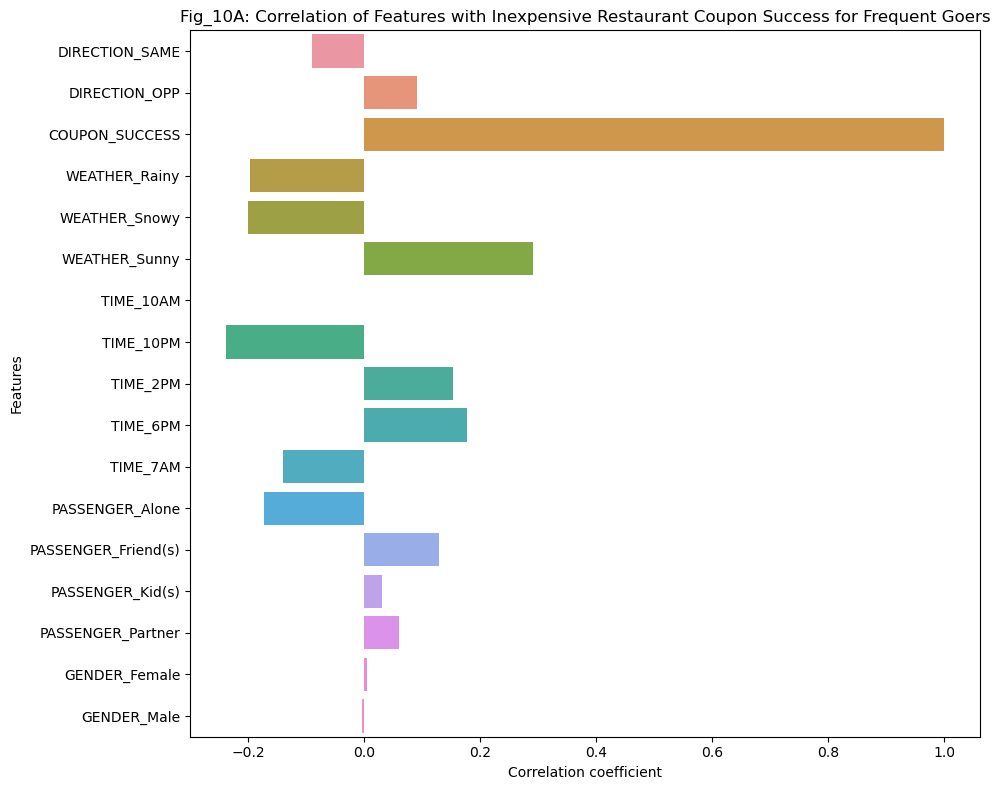

In [49]:
# Get correlation matrix for frequent cheap restaurant visitors
f_c_restaurant_corr = df_f_c_restaurant_reduced.corr()

f_c_restaurant_corr_coupon_success = f_c_restaurant_corr['COUPON_SUCCESS']

# Seaborn plot for correlations to coupon accpetance ratio
plt.figure(figsize=(10, 8))
sns.barplot(x=f_c_restaurant_corr_coupon_success.values, y=f_c_restaurant_corr_coupon_success.index)
plt.title('Fig_10A: Correlation of Features with Inexpensive Restaurant Coupon Success for Frequent Goers')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig10A.jpg')

# Show the plot
plt.show()

## Fig_10A: Correlation of Features with Inexpensive Restaurant Coupon Success for Frequent Goers

This graph compares the correlation between features and the coupon success. As you can see sunny weather correlates strongly with coupon usage. Conversely, if the coupon is received after 10pm at night it is a lot less likely to convert.

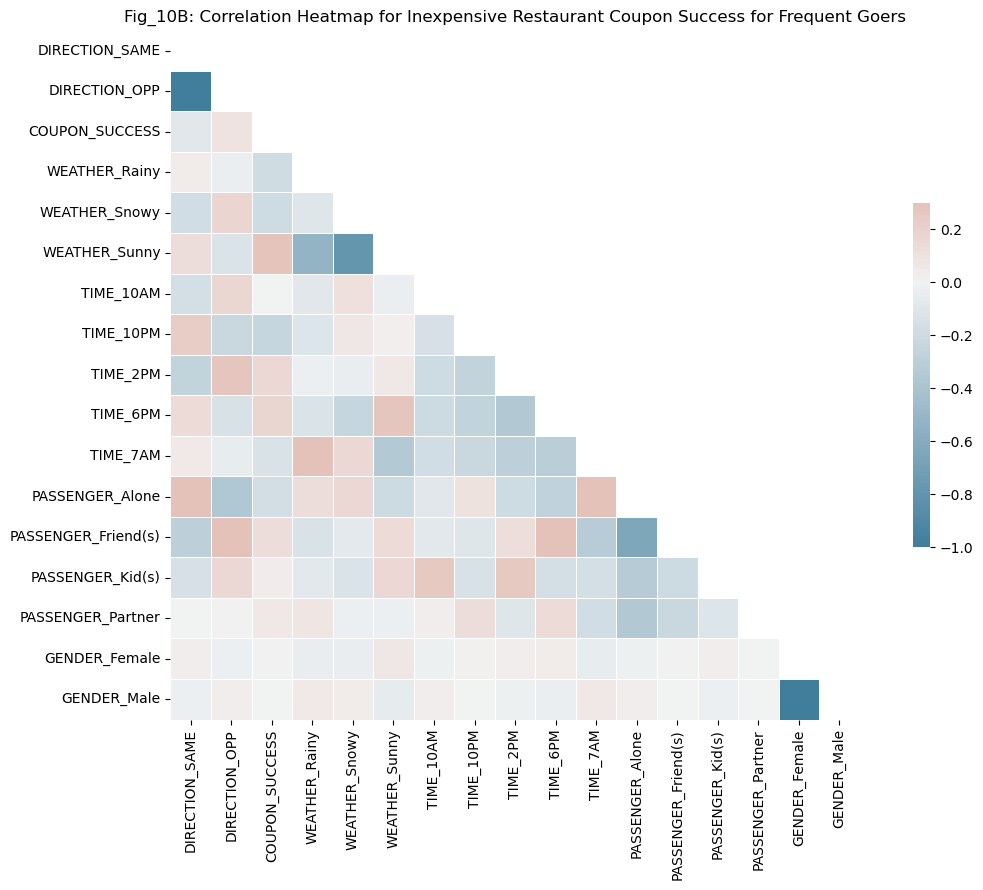

In [48]:
# Assuming df is your DataFrame and "COUPON_SUCCESS" is one of the columns
f_c_restaurant_corr = df_f_c_restaurant_reduced.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(f_c_restaurant_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(f_c_restaurant_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Fig_10B: Correlation Heatmap for Inexpensive Restaurant Coupon Success for Frequent Goers')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig10B.jpg')

# Show the plot
plt.show()

## Fig_10B: Correlation Heatmap for Inexpensive Restaurant Coupon Success for Frequent Goers
If we look at the above correlations we can see that the strongest correlations are obvious negative ones. For example PASSENGER_Friend(s) and PASSENGER_Alone are mutually exclusive, it isn't possible to have selected both.

Now for the more interesting patterns you see that when a driver has a kid or a friend in their car they are more likely to be going away from their house. Perhaps the reason to be driving away from home is to give them a ride to a destination or for an outing together. Additionally, it is more likely than not that the weather would be sunny under those conditions, since these values correlate with eachother. This leads us to a valuable business insight. There is a powerful combination of factors when its sunny, you have friend or kids in the car and you are going away from home, perhaps for a fun outing that deserves celebration at an inexpensive restaurant. Whatever the exact reasons might be (soccer practice commute, errand, etc. ) there could be value in targetting drivers in this particular predicament with context appropriate personalized messaging.

One additional note is that the most popular times for coupon acceptance is 2pm and 6pm. Perhaps because drivers are about to get off of work or get ready for dinner.

In [41]:
# Create a Dataframe Where COUPON is exclusively Bar.  
data_only_bar_coupon = data_clean.query("COUPON == 'Bar'")

# Create dataframe of frequent bar restaurant goers
df_frequent_bar = data_only_bar_coupon.query("(BAR == '4~8') | (BAR == 'gt8')")

# Perform hot encoding on some categorical columns we want to explore.
df_frequent_bar_encoded = pd.get_dummies(df_frequent_bar, columns=['WEATHER', 'TIME', 'PASSENGER', 'GENDER','AGE'])

df_frequent_bar_reduced = pd.DataFrame(df_frequent_bar_encoded[['DIRECTION_SAME', 'DIRECTION_OPP',
       'COUPON_SUCCESS', 'WEATHER_Rainy', 'WEATHER_Snowy', 'WEATHER_Sunny',
       'TIME_10AM', 'TIME_10PM', 'TIME_2PM', 'TIME_6PM', 'TIME_7AM',
       'PASSENGER_Alone', 'PASSENGER_Friend(s)', 'PASSENGER_Kid(s)',
       'PASSENGER_Partner', 'GENDER_Female', 'GENDER_Male','AGE_21', 'AGE_26',
       'AGE_31', 'AGE_36', 'AGE_41', 'AGE_46', 'AGE_50plus', 'AGE_below21']])
df_frequent_bar_reduced.head(5)

,DIRECTION_SAME,DIRECTION_OPP,COUPON_SUCCESS,WEATHER_Rainy,WEATHER_Snowy,WEATHER_Sunny,TIME_10AM,TIME_10PM,TIME_2PM,TIME_6PM,...,GENDER_Female,GENDER_Male,AGE_21,AGE_26,AGE_31,AGE_36,AGE_41,AGE_46,AGE_50plus,AGE_below21
156,0,1,1,False,False,True,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
167,1,0,1,False,False,True,False,False,False,True,...,False,True,False,True,False,False,False,False,False,False
171,0,1,1,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
454,0,1,0,False,False,True,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
465,1,0,1,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


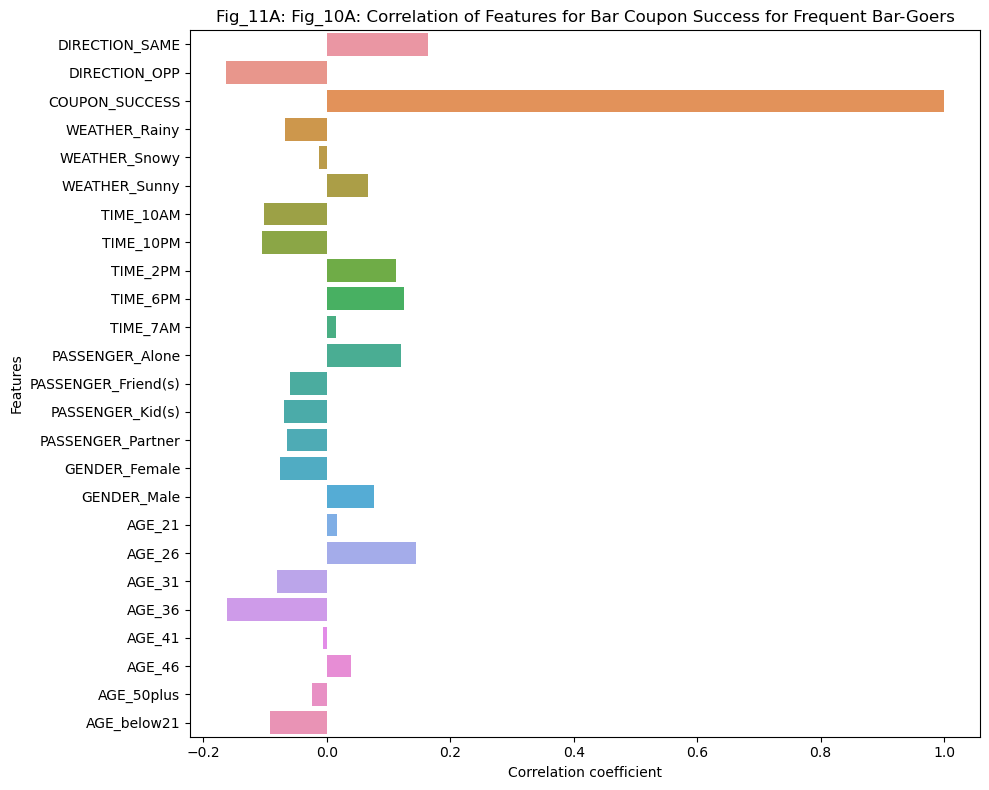

In [52]:
# Get correlations between the columns in the hot one encoded reduced dataframe
df_f_bar_reduced_corr = df_frequent_bar_reduced.corr()

# View only the correlations that directly relate to COUPON_SUCCESS
df_f_bar_reduced_corr_coupon_success = df_f_bar_reduced_corr['COUPON_SUCCESS']

# Seaborn plot

plt.figure(figsize=(10, 8))
sns.barplot(x=df_f_bar_reduced_corr_coupon_success.values, y=df_f_bar_reduced_corr_coupon_success.index)
plt.title('Correlation of Features with Bar Coupon Acceptance Rate for Frequent Bar Goers')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.title('Fig_11A: Fig_10A: Correlation of Features for Bar Coupon Success for Frequent Bar-Goers')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig11A.jpg')

# Show the plot
plt.show()

## Fig_11A: Correlation of Features for Bar Coupon Success for Frequent Bar-Goers

This figure examines the correlation coefficients for frequent bar-goers to assess their conversion rates under various conditions. As you can see, age plays a significant role. Drivers aged 21 and 26 are much more likely to convert. This trend changes dramatically for drivers in their 30s. Interestingly, the direction of travel has a different impact compared to the Restaurant(<20) coupons we previously reviewed. Drivers are much more likely to visit a bar if it’s on their route. Conversely, the likelihood of visiting a bar decreases if they are alone. If they are alone, there is a positive correlation with accepting the bar coupon. We will further query the data to explore these relationships in greater depth.

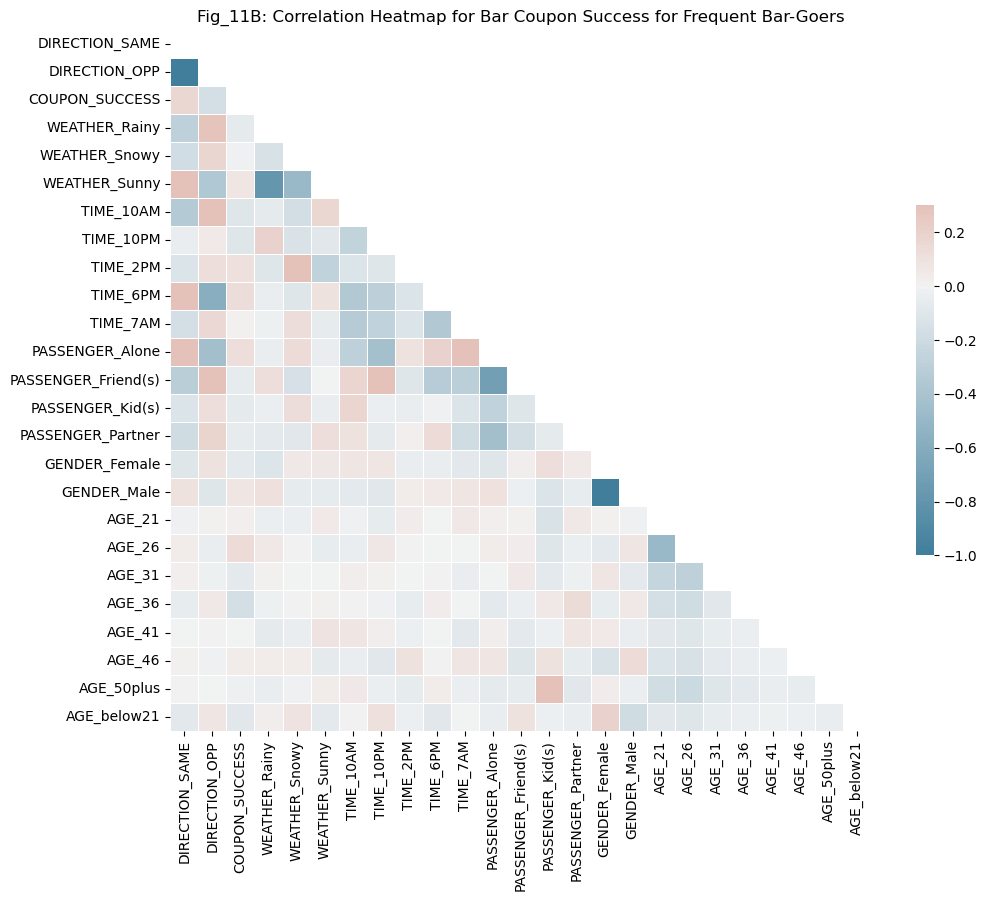

In [53]:
# Get correlations between the columns in the hot one encoded reduced dataframe
df_f_bar_reduced_corr = df_frequent_bar_reduced.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_f_bar_reduced_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_f_bar_reduced_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Fig_11B: Correlation Heatmap for Bar Coupon Success for Frequent Bar-Goers')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig11B.jpg')

# Show the plot
plt.show()

## Fig_11B: Correlation Heatmap for Bar Coupon Success for Frequent Bar-Goers

Similar to Fig_10B, this heatmap allows us to examine correlations between different features, unveiling intriguing combinations.

For example, observe that drivers aged 50 or above are more likely to have a child in the car, which ultimately diminishes the likelihood of them accepting a coupon.

Interestingly, if a driver is 26 years old, they are more likely to receive the coupon (and thus be out driving) at 10pm at night. However, the coupon acceptance rate at 10pm is lower than usual, suggesting there may be additional factors at play.

In the queries section later in this report, we will conduct a deeper exploration into the relationships between passengers, time of day, weather, and more, with a particular focus on the “Bar” coupon. This in-depth analysis aims to shed further light on the factors influencing coupon accepnce.

    


In [44]:
# Create a Dataframe Where COUPON is exclusively Coffee House.
data_only_coffee_house_coupon = data_clean.query("COUPON == 'Coffee House'")

# Create dataframe of frequent coffee house goers
df_frequent_coffee_house_goers = data_only_coffee_house_coupon.query("(COFFEE_HOUSE == '4~8') | (COFFEE_HOUSE == 'gt8')")

# Perform hot encoding on some categorical columns we want to explore.
df_f_coffee_house_encoded = pd.get_dummies(df_frequent_coffee_house_goers, columns=['WEATHER', 'TIME', 'PASSENGER', 'GENDER'])

df_f_coffee_house_reduced = pd.DataFrame(df_f_coffee_house_encoded[['DIRECTION_SAME', 'DIRECTION_OPP',
       'COUPON_SUCCESS', 'WEATHER_Rainy', 'WEATHER_Snowy', 'WEATHER_Sunny',
       'TIME_10AM', 'TIME_10PM', 'TIME_2PM', 'TIME_6PM', 'TIME_7AM',
       'PASSENGER_Alone', 'PASSENGER_Friend(s)', 'PASSENGER_Kid(s)',
       'PASSENGER_Partner', 'GENDER_Female', 'GENDER_Male']])
df_f_coffee_house_reduced.head(5)

,DIRECTION_SAME,DIRECTION_OPP,COUPON_SUCCESS,WEATHER_Rainy,WEATHER_Snowy,WEATHER_Sunny,TIME_10AM,TIME_10PM,TIME_2PM,TIME_6PM,TIME_7AM,PASSENGER_Alone,PASSENGER_Friend(s),PASSENGER_Kid(s),PASSENGER_Partner,GENDER_Female,GENDER_Male
45,0,1,1,False,False,True,True,False,False,False,False,False,True,False,False,False,True
48,0,1,1,False,False,True,False,False,True,False,False,False,True,False,False,False,True
49,0,1,1,False,False,True,False,False,True,False,False,False,True,False,False,False,True
50,0,1,0,False,False,True,False,False,True,False,False,False,True,False,False,False,True
52,0,1,0,False,False,True,False,False,False,True,False,False,True,False,False,False,True


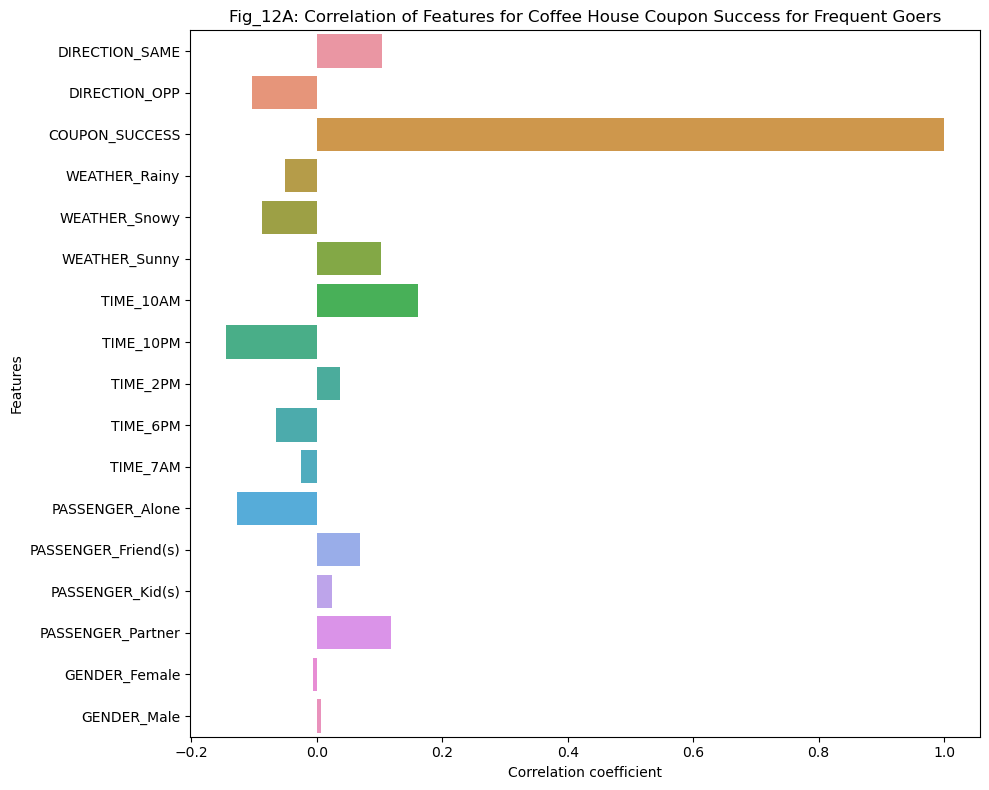

In [54]:
# Get correlations between the columns in the hot one encoded reduced dataframe
df_f_coffee_house_reduced_corr = df_f_coffee_house_reduced.corr()

# View only the correlations that directly relate to COUPON_SUCCESS
df_f_coffee_house_reduced_corr_coupon_success = df_f_coffee_house_reduced_corr['COUPON_SUCCESS']

# Seaborn plot

plt.figure(figsize=(10, 8))
sns.barplot(x=df_f_coffee_house_reduced_corr_coupon_success.values, y=df_f_coffee_house_reduced_corr_coupon_success.index)
plt.title('Correlation of Features with Coffee House Coupon Acceptance Rate for Frequent Coffee House Goers')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

plt.title('Fig_12A: Correlation of Features for Coffee House Coupon Success for Frequent Goers')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig12A.jpg')

# Show the plot
plt.show()

## Fig_12A: Correlation of Features for Coffee House Coupon Success for Frequent Goers

As you might expect, coupons are much more likely to be successful at 10am in the morning than at 10pm at night. Many people find the effects of coffee to be beneficial at the start of the day and detrimental at night, so this is not surprising.

For this coupon, having your partner present in your car has a higher positive correlation than any other passenger. Being alone is negatively correlated with accepting the coupon.

Weather does seem to play a role, with sunny weather being the most favorable to coupon success.

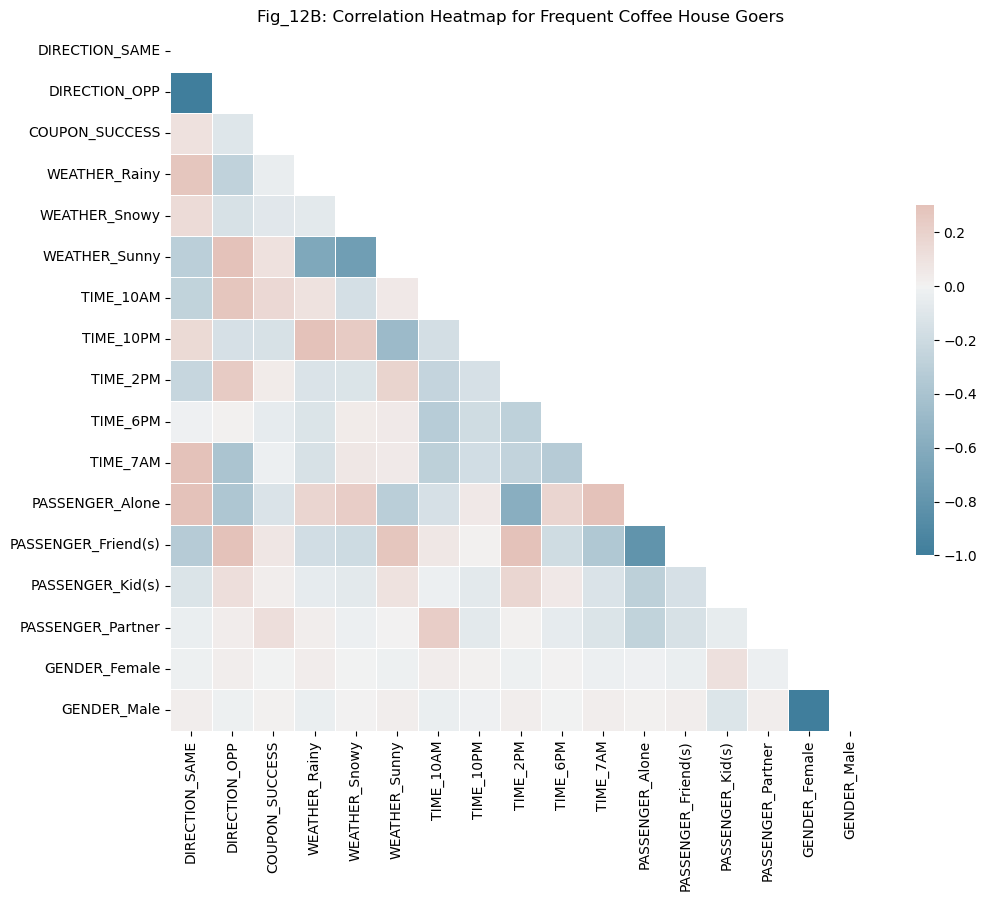

In [55]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_f_coffee_house_reduced_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_f_coffee_house_reduced_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Fig_12B: Correlation Heatmap for Frequent Coffee House Goers')

# Adjust layout to prevent labels from being cropped off
plt.tight_layout()

# Save plot
plt.savefig('images/plots/fig12B.jpg')

# Show the plot
plt.show()

## Fig_12B: Correlation Heatmap for Frequent Coffee House Goers

As observed earlier, the success of a coupon correlates positively with instances where drivers have a partner in the car. Interestingly, this scenario also correlates with the time being 10am. This suggests a potent combination of factors that could enhance the likelihood of coupon acceptance.

Moreover, sunny weather appears to correlate positively with coupon acceptance. This correlation is also observed when one or more friends are present in the car. This combination of factors seems to contribute significantly to the success of the coffee shop coupon. These insights could be instrumental in strategizing effective coupon campaigns.